# Georgetown University 
## Data Science Certificate Program - Spring 2017
## Panama Papers - Capstone Project
### Team Members - Anders Pedersen, Abiy Kifle, Chris Marokov, Niraj Sheth

The Panama Papers was an investigation pursued by the International Consortium of Investigative Journalism (ICIJ) in 2016 based on 11.5m leaked files from the database of the world’s fourth biggest offshore law firm, Mossack Fonseca based in Panama. While Mossack Fonseca accounts for large portions of the Panama Paper data, leaks from offshore service providers Portcullis Trustnet (now Portcullis) and Commonwealth Trust Limited accounted for a third of the overall data[1].

The investigation was co-produced with more than 100 journalists and spurred national government investigations in dozens of countries while sparking a global debate on the need for beneficial ownership regulation.  
As part of the investigation more than 500,000 offshore companies we gathered into a database and linked with previous investigations named Offshore Leaks and Bahamas Leaks. The database is being made available by ICIJ under an open database license and is therefore free to use without restrictions. 

## Data Source

The Panama Papers data is comprised of five csv data sets from ICIJ that includes entities, intermediaries, officers, addresses, and all edges(relationships between agents and entities).

1. Entities.csv
2. Intermediaries.csv
3. Officers.csv
4. Addresses.csv
5. All_Edges.csv

## Key Data Elements

* Entity: A company, trust or fund created in a low-tax, offshore jurisdiction by an agent.
* Agent (registered agent or offshore service provider): Firm that provides services in an offshore jurisdiction to incorporate, register and manage an offshore entity at the request of a client.
* Officer: A person or company who plays a role in an offshore entity.
* Intermediary: A go-between for someone seeking an offshore corporation and an offshore service provider -- usually a law-firm or a middleman that asks an offshore service provider to create an offshore firm for a client.
* Address: Contact postal address as it appears in the original databases obtained by ICIJ.

For additional description of data elements, refer to https://offshoreleaks.icij.org/pages/about#terms_definition

### Analysis Approach

1. Clustering
2. Network graph analysis using networkx


#### Reference:
[1] https://offshoreleaks.icij.org/pages/about
[2] https://panamapapers.icij.org/#_ga=2.247812999.125016791.1498517622-1457334535.1496192192




## Clustering

## Graph Analysis using Networkx

In this section, we're attempting to create a visual representation of the Panama Papers. This representation is intended to be shown as a graph using the functionalities of networkx.

![alt text](Networks.png "Title")

In [1]:
#Import necessary python libraries

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### The team uploaded the ICIJ data set in a Microsoft Azure for efficient use of storage space. Pandas library is used to read the csv files.

In [2]:
a = pd.read_csv("https://panamadata.blob.core.windows.net/icij/all_edges.csv")
e = pd.read_csv("https://panamadata.blob.core.windows.net/icij/Entities.csv")
i = pd.read_csv("https://panamadata.blob.core.windows.net/icij/Intermediaries.csv")
o = pd.read_csv("https://panamadata.blob.core.windows.net/icij/Officers.csv")
ad = pd.read_csv("https://panamadata.blob.core.windows.net/icij/Addresses.csv")

#### Review content from each dataset

In [3]:
# All Edges
a.head(3)

,node_1,rel_type,node_2,sourceID,valid_until,start_date,end_date
0,11000001,intermediary of,10208879,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
1,11000001,intermediary of,10198662,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
2,11000001,intermediary of,10159927,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN


In [4]:
# Entities
e.head(3)

,name,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,...,dorm_date,status,service_provider,ibcRUC,country_codes,countries,note,valid_until,node_id,sourceID
0,"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,18-FEB-2013,...,NaN,Defaulted,Mossack Fonseca,25221,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000001,Panama Papers
1,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,27-MAR-2006,27-FEB-2014,...,NaN,Defaulted,Mossack Fonseca,25249,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000002,Panama Papers
2,"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,10-JAN-2006,15-FEB-2012,...,NaN,Defaulted,Mossack Fonseca,24138,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000003,Panama Papers


In [5]:
#Intermediaries
i.head(3)

,name,internal_id,address,valid_until,country_codes,countries,status,node_id,sourceID,note
0,"MICHAEL PAPAGEORGE, MR.",10001,MICHAEL PAPAGEORGE; MR. 106 NICHOLSON STREET B...,The Panama Papers data is current through 2015,ZAF,South Africa,ACTIVE,11000001,Panama Papers,NaN
1,CORFIDUCIA ANSTALT,10004,NaN,The Panama Papers data is current through 2015,LIE,Liechtenstein,ACTIVE,11000002,Panama Papers,NaN
2,"DAVID, RONALD",10014,NaN,The Panama Papers data is current through 2015,MCO,Monaco,SUSPENDED,11000003,Panama Papers,NaN


In [6]:
#Officers
o.head(3)

,name,icij_id,valid_until,country_codes,countries,node_id,sourceID,note
0,KIM SOO IN,E72326DEA50F1A9C2876E112AAEB42BC,The Panama Papers data is current through 2015,KOR,South Korea,12000001,Panama Papers,NaN
1,Tian Yuan,58287E0FD37852000D9D5AB8B27A2581,The Panama Papers data is current through 2015,CHN,China,12000002,Panama Papers,NaN
2,GREGORY JOHN SOLOMON,F476011509FD5C2EF98E9B1D74913CCE,The Panama Papers data is current through 2015,AUS,Australia,12000003,Panama Papers,NaN


In [7]:
#Addresses
ad.head(3)

,address,icij_id,valid_until,country_codes,countries,node_id,sourceID,note
0,-\t27 ROSEWOOD DRIVE #16-19 SINGAPORE 737920,6991059DFFB057DF310B9BF31CC4A0E6,The Panama Papers data is current through 2015,SGP,Singapore,14000001,Panama Papers,NaN
1,"""Almaly Village"" v.5, Almaty Kazakhstan",C65A269424AA1A8BBAC416FA30150938,The Panama Papers data is current through 2015,KAZ,Kazakhstan,14000002,Panama Papers,NaN
2,"""Cantonia"" South Road St Georges Hill Weybridg...",240EE44DFB70AF775E6CD02AF8CB889B,The Panama Papers data is current through 2015,GBR,United Kingdom,14000003,Panama Papers,NaN


#### Create dataframes for each of the datasets

In [8]:
pp_edge = pd.DataFrame(a)
pp_entity = pd.DataFrame(e)
pp_intermediary = pd.DataFrame(i)
pp_officer = pd.DataFrame(o)
pp_address = pd.DataFrame(ad)

In [9]:
# Use pandas groupby() frunction to determine loactions with the highest incorporation rates
# Here we're counting how many entities there are per jurisdiction

shell_locations = pp_entity.groupby(['jurisdiction_description'])["name"].count().reset_index(name="Entity Count")
shell_locations

,jurisdiction_description,Entity Count
0,Bahamas,191833
1,Belize,130
2,Bermuda,6
3,British Anguilla,3253
4,British Virgin Islands,151585
5,Brunei,2
6,Cayman,668
7,China,1
8,Cook Islands,2638
9,Costa Rica,78


#### All Edges datasets provides "intermediary of a" type relationship between the go between entities and agents. For the purposes of our analysis, filter edge data to show only relationships that are intermediaries. A sample record below indicates additional relationships.

In [11]:
#Sample edge data
pp_edge[pp_edge['node_2'] == 10000001]

,node_1,rel_type,node_2,sourceID,valid_until,start_date,end_date
43690,11001746,intermediary of,10000001,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
689951,12160432,shareholder of,10000001,Panama Papers,The Panama Papers data is current through 2015,23-MAR-2006,NaN
755358,12203574,shareholder of,10000001,Panama Papers,The Panama Papers data is current through 2015,23-MAR-2006,NaN


In [12]:
#Create a new DataFrame with records with only a "intermediary of" relationship type
pp_edge_2 = pp_edge[pp_edge['rel_type'] == "intermediary of"]

In [13]:
pp_edge_2.head(3)

,node_1,rel_type,node_2,sourceID,valid_until,start_date,end_date
0,11000001,intermediary of,10208879,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
1,11000001,intermediary of,10198662,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
2,11000001,intermediary of,10159927,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN


### Use Pandas merge functionality to refine our data

In [14]:
# Merge 1
# Pandas function - merge
# Type of join performed - inner join to only get records that are present in both the entities and edges datasets

test_1 = pd.merge(pp_entity,pp_edge_2, how='inner', left_on='node_id',right_on = 'node_2')
test_1.head(3)

,name,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,...,valid_until_x,node_id,sourceID_x,node_1,rel_type,node_2,sourceID_y,valid_until_y,start_date,end_date
0,"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,18-FEB-2013,...,The Panama Papers data is current through 2015,10000001,Panama Papers,11001746,intermediary of,10000001,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
1,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,27-MAR-2006,27-FEB-2014,...,The Panama Papers data is current through 2015,10000002,Panama Papers,11001746,intermediary of,10000002,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
2,"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,10-JAN-2006,15-FEB-2012,...,The Panama Papers data is current through 2015,10000003,Panama Papers,11001746,intermediary of,10000003,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN


In [15]:
# Merge 2
# From Merge 1 performed above and the intermediaries dataset, create a new dataset

test_2 = pd.merge(test_1,pp_intermediary, how='inner', left_on='node_1',right_on = 'node_id')
test_2.head(3)

,name_x,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address_x,internal_id_x,incorporation_date,inactivation_date,...,name_y,internal_id_y,address_y,valid_until,country_codes_y,countries_y,status_y,node_id_y,sourceID,note_y
0,"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,18-FEB-2013,...,ORION HOUSE SERVICES (HK) LIMITED,11987,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,The Panama Papers data is current through 2015,HKG,Hong Kong,ACTIVE,11001746,Panama Papers,NaN
1,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,27-MAR-2006,27-FEB-2014,...,ORION HOUSE SERVICES (HK) LIMITED,11987,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,The Panama Papers data is current through 2015,HKG,Hong Kong,ACTIVE,11001746,Panama Papers,NaN
2,"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,10-JAN-2006,15-FEB-2012,...,ORION HOUSE SERVICES (HK) LIMITED,11987,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,The Panama Papers data is current through 2015,HKG,Hong Kong,ACTIVE,11001746,Panama Papers,NaN


### Create a new dictionary with columns that will be used in graph analysis

In [16]:
# Import "collections" python library in order to create an ordered dictionary

import collections
new_dict = {'name': test_2['name_x'],
            'jurisdiction_description': test_2['jurisdiction_description'],
            'address': test_2['address_x'],
            'intermediary_name': test_2['name_y'],
            'country_code': test_2['country_codes_y'],
            'country': test_2['countries_y'],
            'status': test_2['status_y']
           }
name_dict = test_2['name_x']
jurisdiction_dict = test_2['jurisdiction_description']
address_dict = test_2['address_x']
intermediary_dict = test_2['name_y']
code_dict = test_2['country_codes_y']
country_dict = test_2['countries_y']
status_dict = test_2['status_y']
new_dict = collections.OrderedDict(new_dict)

In [17]:
# Convert our new dictionary into a Pandas DataFrame and display the summary details

df = pd.DataFrame(new_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494997 entries, 0 to 494996
Data columns (total 7 columns):
name                        494993 non-null object
jurisdiction_description    494997 non-null object
address                     299314 non-null object
intermediary_name           494991 non-null object
country_code                480648 non-null object
country                     480648 non-null object
status                      202379 non-null object
dtypes: object(7)
memory usage: 30.2+ MB


In [18]:
#Limiting the data set to specific jurisdictions with the most data
#scope_list = ["Bahamas","British Virgin Islands","Niue","Panama","Samoa","Seychelles","Undetermined"]
scope_list = ["Niue"]
df_2 = df.loc[df['jurisdiction_description'].isin(scope_list)]        

In [19]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9611 entries, 4012 to 419455
Data columns (total 7 columns):
name                        9611 non-null object
jurisdiction_description    9611 non-null object
address                     9577 non-null object
intermediary_name           9611 non-null object
country_code                9078 non-null object
country                     9078 non-null object
status                      9078 non-null object
dtypes: object(7)
memory usage: 600.7+ KB


In [20]:
df_2.head(3)

,name,jurisdiction_description,address,intermediary_name,country_code,country,status
4012,"GENERAL ENGINEERING (HK) CO., LTD.",Niue,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,ORION HOUSE SERVICES (HK) LIMITED,HKG,Hong Kong,ACTIVE
4013,LONG HARVEST INVESTMENTS LIMITED,Niue,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,ORION HOUSE SERVICES (HK) LIMITED,HKG,Hong Kong,ACTIVE
7018,WINNER HOLDINGS LTD.,Niue,LOYAL PORT LIMITED 8/F; CRAWFORD TOWER 99 JERV...,LOYAL PORT LIMITED,HKG,Hong Kong,SUSPENDED


In [21]:
#Create tuples of nodes and edges
edge1 = zip(df_2['jurisdiction_description'],df_2['intermediary_name'].unique())
edge2 = zip(df_2['intermediary_name'].unique(),df_2['name'])
edge3 = zip(df_2['name'],df_2['country_code'].unique())
mylist1 = list(edge1)
mylist2 = list(edge2)
mylist3 = list(edge3)

## Networkx Graph

In [22]:
# Create a networkx graph
G = nx.Graph()
G.add_edges_from(mylist1)
G.add_edges_from(mylist2)
G.add_edges_from(mylist3)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1975
Number of edges: 1974
Average degree:   1.9990


### Next, we'll identify the following metrix about our graph 
1. Center - Center of graph
2. Closeness Centrality - calculates the closeness centrality for nodes
3. Betweenness Centrality - measure of centrality in a graph based on shortest paths


In [23]:
# Center of Graph
nx.center(G)

['Niue']

In [27]:
# Closeness Centrality
nx.closeness_centrality(G)

{'Niue': 0.6432062561094819,
 'ORION HOUSE SERVICES (HK) LIMITED': 0.39182215164747913,
 'LOYAL PORT LIMITED': 0.39182215164747913,
 'FCI DAVID RISBEY': 0.39182215164747913,
 'MOSSACK FONSECA & CO. (SINGAPORE) PTE LTD.': 0.39182215164747913,
 'DI SAN DI MANAGEMENT COMPANY LIMITED': 0.39182215164747913,
 'METAXAS, SPYRO A.': 0.39182215164747913,
 'MIGUEL NETO ADVOGADOS': 0.39182215164747913,
 'MCG S.A.': 0.39182215164747913,
 'SINO-WEST INTERNATIONAL CO., LTD.': 0.39182215164747913,
 'MOSSACK FONSECA & CO.': 0.39182215164747913,
 'MOSSACK FONSECA & CO. CZ, S.R.O': 0.39182215164747913,
 'EUROFIN SERVICES S.A.': 0.39182215164747913,
 'GESTAR S.A.': 0.39182215164747913,
 'ZOLTY, LIC. ANDRE': 0.39182215164747913,
 'AUDINA TREUHAND AG': 0.39182215164747913,
 'FORVEST TRUST S.A.': 0.39182215164747913,
 'PERFECT COMPANY': 0.39182215164747913,
 'GLOBAL STAR CONSULTANTS LIMITED': 0.39182215164747913,
 'QUICKEY ACCOUNTING & SECRETARIAL SERVICES LIMITED': 0.39182215164747913,
 'FEDERICO DE VITTORI

In [28]:
# Betweenness Centrality
nx.betweenness_centrality(G)

{'Niue': 0.9994376976723766,
 'ORION HOUSE SERVICES (HK) LIMITED': 0.0020253154156595296,
 'LOYAL PORT LIMITED': 0.0020253154156595296,
 'FCI DAVID RISBEY': 0.0020253154156595296,
 'MOSSACK FONSECA & CO. (SINGAPORE) PTE LTD.': 0.0020253154156595296,
 'DI SAN DI MANAGEMENT COMPANY LIMITED': 0.0020253154156595296,
 'METAXAS, SPYRO A.': 0.0020253154156595296,
 'MIGUEL NETO ADVOGADOS': 0.0020253154156595296,
 'MCG S.A.': 0.0020253154156595296,
 'SINO-WEST INTERNATIONAL CO., LTD.': 0.0020253154156595296,
 'MOSSACK FONSECA & CO.': 0.0020253154156595296,
 'MOSSACK FONSECA & CO. CZ, S.R.O': 0.0020253154156595296,
 'EUROFIN SERVICES S.A.': 0.0020253154156595296,
 'GESTAR S.A.': 0.0020253154156595296,
 'ZOLTY, LIC. ANDRE': 0.0020253154156595296,
 'AUDINA TREUHAND AG': 0.0020253154156595296,
 'FORVEST TRUST S.A.': 0.0020253154156595296,
 'PERFECT COMPANY': 0.0020253154156595296,
 'GLOBAL STAR CONSULTANTS LIMITED': 0.0020253154156595296,
 'QUICKEY ACCOUNTING & SECRETARIAL SERVICES LIMITED': 0.0020

### Plot graph G

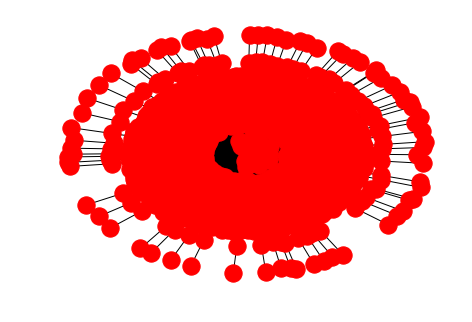

In [29]:
nx.draw(G)
plt.show()

<function matplotlib.pyplot.show>

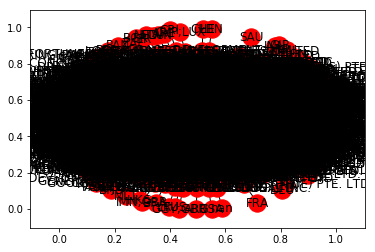

In [31]:
nx.draw_networkx(G)
plt.show

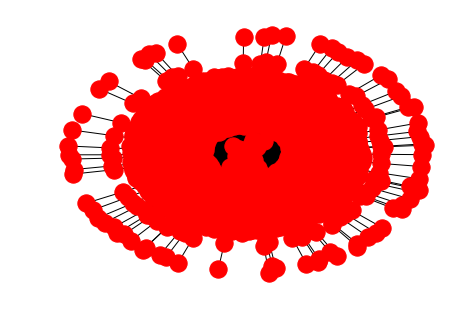

In [32]:
nx.draw(G, cmap = plt.get_cmap('jet'))
plt.show()

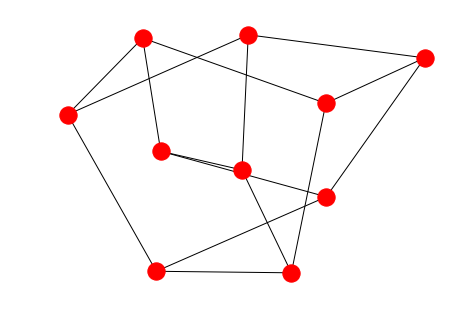

In [33]:
G2 = nx.petersen_graph(G)
nx.draw(G2)
plt.show()

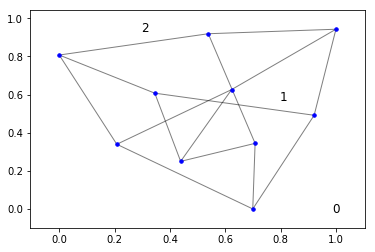

In [34]:
#pos = nx.spring_layout(g1,scale=2)
pos = nx.spring_layout(G)
graph_pos = nx.shell_layout(G)
#nx.draw_networkx_edges(g1, pos, font_size= 7, edge_color='red', arrows=True)
nx.draw_networkx_nodes(G,pos,node_color='b',alpha=1,node_size=12)
nx.draw_networkx_edges(G,pos,alpha=0.5)
nx.draw_networkx_labels(G, graph_pos, font_size=12, font_family='sans-serif')
plt.show()

## Algorithms

In [36]:
nx.average_clustering(G)

0.0

## Tool to further enhance analysis

D3 Visualisation Software

## Other data science use of Panama Papers

Data from the Panama Papers has already provided input to data driven research:  
Researchers at University of Michigan used the data to study whether and how the use of offshore shelters affects company value and found that the leak erased 135 billion dollar in market capitalization among 397 public firms that were traced as users of offshore vehicles exposed in the leak. 
Researchers at University of Berkeley et. al used data from the Panama Papers to estimate tax avoidance among income elites in Scandinavia. “On average about 3% of personal taxes are evaded but this figure rises to about 30% in the top 0.01% of the wealth distribution, a group that includes households with more than 40 million dollar in net wealth.”